In [18]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy.io
import networkx as nx
import igraph as ig
from mat4py import loadmat

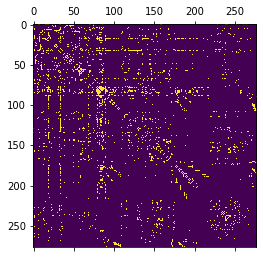

In [3]:
#loading the graphml file with nx
G = nx.read_graphml('./Networks/celegans277.graphml')

#loading the nx graph to igraph
g = ig.Graph.TupleList(G.edges(), directed=False)

A_mat = g.get_adjacency()
A_mat = np.array(A_mat)

A_mat = (A_mat > 0).astype(np.int_) #making it binary matrix 

# scipy.io.savemat('adjacency_277.mat', {'mydata': A_mat})

G = nx.from_numpy_matrix(A_mat)
g = ig.Graph.TupleList(G.edges(), directed=False) #loading it back to ig graph handle

plt.matshow(A_mat)


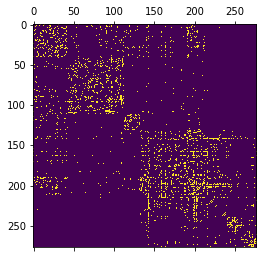

In [9]:
#Community detection algorithm (for finding 6 modules)

wtrap = g.community_walktrap(steps = 6)
cluster = wtrap.as_clustering()
# ig.plot(clust, mark_groups = True, bbox=(300,300), vertex_label=g.vs['name'])

A_mat = g.get_adjacency()
A_mat = np.array(A_mat.data)
A = np.array(list(A_mat))

#reordering of the adjacency matrix to cluster-wise 

idx = np.argsort(cluster.membership)
A_reordered = A[np.ix_(idx, idx)]

temp = nx.from_numpy_array(A_reordered)
nx.write_graphml(temp,'network_worm.graphml')

# Uncomment this if you want to save the reordered adjacency matrix as .mat file and load it in MATLAB to visualize 
# A_reordered = nx.to_numpy_array(G)

scipy.io.savemat('adjacency_277_reorder.mat', {'mydata': A_reordered})


plt.matshow(A_reordered)

mat = scipy.io.loadmat('l.mat')

In [6]:
for i in range(6):
    print("Size of cluster {size} is {size2}\n".format(size = i,size2 = len(cluster[i])))

Size of cluster 0 is 43

Size of cluster 1 is 69

Size of cluster 2 is 20

Size of cluster 3 is 108

Size of cluster 4 is 18

Size of cluster 5 is 19



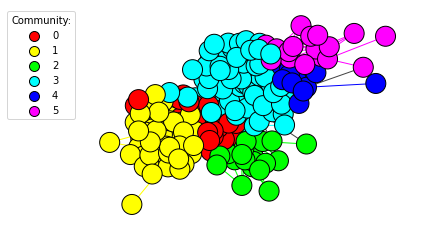

In [5]:
communities = cluster
num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i


fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()
